In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate

Using TensorFlow backend.


In [3]:
(train_images, att_train, train_labels), testSets = getData(  indexFileRoot='pickles/testIndexesRot', testTrainSplit=0.15)
test_labels, test_images, test_ids = None, None, None
for i in testSets.keys():
    if test_labels is None:
        test_images = testSets[i]['images']
        test_labels = testSets[i]['labels']
        test_ids = testSets[i]['clusterID']
    else:
        test_labels = np.vstack((test_labels, testSets[i]['labels']))
        test_images = np.vstack((test_images, testSets[i]['images']))
        test_ids = np.vstack((test_ids, testSets[i]['clusterID']))
nClasses = len(np.unique(train_labels))
inputShape = train_images.shape[1:]

(3600, 100, 100, 3)
1200
nTests is 180
1200
nTests is 180
1200
nTests is 180


In [ ]:

color=['r','g','b','c','y','o']
fig, [ax1, ax2]  = plt.subplots( 1, 2, figsize=(10,5))
#Test the dropout on reliability
for i, nRotations in enumerate([1, 5, 10, 20]):
    allRotatedImages = []
    allRotatedLabels = []
    
    imageSize = train_images[0,:,:,0].shape[0]
    

    csv_file = 'pickles/testRotations_%0.2f_finalLayer_2048_dropout_0.3.csv' % nRotations
    
    csv_logger = CSVLogger(csv_file, append=True)
    model_file =  'pickles/testRotations_%0.2f_finalLayer_2048_dropout_0.3.h5' % nRotations
    
    if os.path.isfile( csv_file ):
        previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
        initial_epoch = previousEpochs.shape[0]
    else:
        initial_epoch = 0
        
    if os.path.isfile(model_file):
        print("FOUND PREVIOUS MODEL, LOADING...")
        model = models.load_model(model_file)
    else:
        for iImage in range(train_images.shape[0]):
            for iAngle in range(nRotations):
                rotAngle = np.random.uniform(0, 360)
                rotatedImage = rotate(train_images[iImage, :,:, 0], rotAngle)
                centralPix = rotatedImage.shape[0]//2
                croppedImage = rotatedImage[centralPix-imageSize//2:centralPix+imageSize//2,centralPix-imageSize//2:centralPix+imageSize//2 ]
                allRotatedImages.append(croppedImage )
                allRotatedLabels.append( train_labels[iImage,0])
        allRotatedImages = np.array(allRotatedImages)
        newImages = allRotatedImages[:,:,:,np.newaxis]
        allRotatedLabels = np.array(allRotatedLabels)
        newLabels = allRotatedLabels[:,np.newaxis]


        model = simpleCNN.getModel( inputShape, nClasses, dropout=0.2, finalLayer=2048, learning_rate=3e-6)
        
        
        history = model.fit(newImages, newLabels, epochs=10, 
                    initial_epoch=initial_epoch,
                    validation_data=(test_images, test_labels),
                       callbacks=csv_logger)
        model.save(model_file)

    trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    
    ax1.plot(trainHistory['loss'], label='%i' % nRotations, color=color[i])
    ax1.plot(trainHistory['val_loss'], label='%i' % nRotations, linestyle='--', color=color[i])
    
    ax2.plot(trainHistory['accuracy'], label = '%i' % nRotations, linestyle='-', color=color[i]) 
    ax2.plot(trainHistory['val_accuracy'], label = '%i' % nRotations, linestyle='--', color=color[i]) 
ax1.legend()   
ax2.legend()

FOUND PREVIOUS MODEL, LOADING...
FOUND PREVIOUS MODEL, LOADING...
Learning Rate 3.000E-06
Epoch 1/10
957/957 [==============================] - 406s 422ms/step - loss: 1.0955 - accuracy: 0.4483 - val_loss: 1.0723 - val_accuracy: 0.4722
Epoch 2/10
957/957 [==============================] - 409s 428ms/step - loss: 0.7473 - accuracy: 0.6729 - val_loss: 1.1010 - val_accuracy: 0.4611
Epoch 3/10
957/957 [==============================] - 410s 428ms/step - loss: 0.5697 - accuracy: 0.7875 - val_loss: 1.1412 - val_accuracy: 0.4759
Epoch 4/10
957/957 [==============================] - 410s 429ms/step - loss: 0.4225 - accuracy: 0.8723 - val_loss: 1.2088 - val_accuracy: 0.4463
Epoch 5/10
957/957 [==============================] - 410s 428ms/step - loss: 0.3108 - accuracy: 0.9234 - val_loss: 1.2610 - val_accuracy: 0.4537
Epoch 6/10
957/957 [==============================] - 409s 428ms/step - loss: 0.2254 - accuracy: 0.9558 - val_loss: 1.3361 - val_accuracy: 0.4593
Epoch 7/10
957/957 [==============

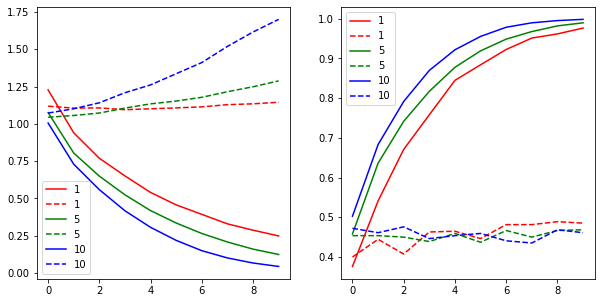

In [5]:

color=['r','g','b','c','y','o']
fig, [ax1, ax2]  = plt.subplots( 1, 2, figsize=(10,5))
#Test the dropout on reliability
for i, nTranslations in enumerate([1, 5, 10]):
    allRotatedImages = []
    allRotatedLabels = []
    
    imageSize = train_images[0,:,:,0].shape[0]
    

    csv_file = 'pickles/testTranslate_%0.2f_finalLayer_2048_dropout_0.3.csv' % nTranslations
    
    csv_logger = CSVLogger(csv_file, append=True)
    model_file =  'pickles/testTranslate_%0.2f_finalLayer_2048_dropout_0.3.h5' % nTranslations
    
    if os.path.isfile( csv_file ):
        previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
        initial_epoch = previousEpochs.shape[0]
    else:
        initial_epoch = 0
        
    if os.path.isfile(model_file):
        print("FOUND PREVIOUS MODEL, LOADING...")
        model = models.load_model(model_file)
    else:
        for iImage in range(train_images.shape[0]):
            for iAngle in range(nTranslations):
                xTranslation = np.random.randint(-4, 4)
                yTranslation = np.random.randint(-4, 4)
                
                translatedX = np.roll( train_images[iImage, :,:, 0], xTranslation, axis=0)
                translatedXY = np.roll( translatedX, yTranslation, axis=1)

                allRotatedImages.append(translatedXY )
                allRotatedLabels.append( train_labels[iImage,0])
                
        allRotatedImages = np.array(allRotatedImages)
        newImages = allRotatedImages[:,:,:,np.newaxis]
        allRotatedLabels = np.array(allRotatedLabels)
        newLabels = allRotatedLabels[:,np.newaxis]


        model = simpleCNN.getModel( inputShape, nClasses, dropout=0.2, finalLayer=2048, learning_rate=3e-6)
        
        
        history = model.fit(newImages, newLabels, epochs=10, 
                    initial_epoch=initial_epoch,
                    validation_data=(test_images, test_labels),
                       callbacks=csv_logger)
        model.save(model_file)

    trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    
    ax1.plot(trainHistory['loss'], label='%i' % nTranslations, color=color[i])
    ax1.plot(trainHistory['val_loss'], label='%i' % nTranslations, linestyle='--', color=color[i])
    
    ax2.plot(trainHistory['accuracy'], label = '%i' % nTranslations, linestyle='-', color=color[i]) 
    ax2.plot(trainHistory['val_accuracy'], label = '%i' % nTranslations, linestyle='--', color=color[i]) 
ax1.legend()   
ax2.legend()

In [ ]:
from scipy.interpolate import interp2d

color=['r','g','b','c','y','o']
fig, [ax1, ax2]  = plt.subplots( 1, 2, figsize=(10,5))
#Test the dropout on reliability
imageSize = train_images[0,:,:,0].shape
centrePix = imageSize[0] // 2

xVector = np.arange(imageSize[0])-centrePix



for i, nRescale in enumerate([1, 5, 10, 20]):
    allRotatedImages = []
    allRotatedLabels = []
    
    

    csv_file = 'pickles/testRescale_%0.2f_finalLayer_2048_dropout_0.3.csv' % nRescale
    
    csv_logger = CSVLogger(csv_file, append=True)
    model_file =  'pickles/testRescale_%0.2f_finalLayer_2048_dropout_0.3.h5' % nRescale
    
    if os.path.isfile( csv_file ):
        previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
        initial_epoch = previousEpochs.shape[0]
    else:
        initial_epoch = 0
        
    if os.path.isfile(model_file):
        print("FOUND PREVIOUS MODEL, LOADING...")
        model = models.load_model(model_file)
    else:
        for iImage in range(train_images.shape[0]):
            for iAngle in range(nRescale):
                rescale = 10**np.random.uniform(np.log10(0.13), np.log10(1.3))
                
                newSize = np.int(rescale*imageSize[0])
                

                newXVector = (np.arange(imageSize[0])-centrePix)*rescale

                
                interpFunc = interp2d( xVector, xVector, train_images[iImage, :,:, 0].reshape( np.prod(imageSize)))
                
                newImage = interpFunc( newXVector, newXVector)
                
                
      
                allRotatedImages.append(newImage )
                allRotatedLabels.append( train_labels[iImage,0])
        allRotatedImages = np.array(allRotatedImages)
        newImages = allRotatedImages[:,:,:,np.newaxis]
        allRotatedLabels = np.array(allRotatedLabels)
        newLabels = allRotatedLabels[:,np.newaxis]


        model = simpleCNN.getModel( inputShape, nClasses, dropout=0.2, finalLayer=2048, learning_rate=3e-6)
        
        
        history = model.fit(newImages, newLabels, epochs=10, 
                    initial_epoch=initial_epoch,
                    validation_data=(test_images, test_labels),
                       callbacks=csv_logger)
        model.save(model_file)

    trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    
    ax1.plot(trainHistory['loss'], label='%i' % nRescale, color=color[i])
    ax1.plot(trainHistory['val_loss'], label='%i' % nRescale, linestyle='--', color=color[i])
    
    ax2.plot(trainHistory['accuracy'], label = '%i' % nRescale, linestyle='-', color=color[i]) 
    ax2.plot(trainHistory['val_accuracy'], label = '%i' % nRescale, linestyle='--', color=color[i]) 
ax1.legend()   
ax2.legend()

FOUND PREVIOUS MODEL, LOADING...
FOUND PREVIOUS MODEL, LOADING...
FOUND PREVIOUS MODEL, LOADING...
Learning Rate 3.000E-06
Epoch 1/10
1913/1913 [==============================] - 1582s 824ms/step - loss: 1.0289 - accuracy: 0.4863 - val_loss: 1.1395 - val_accuracy: 0.4537
Epoch 2/10
1913/1913 [==============================] - 1535s 802ms/step - loss: 0.7995 - accuracy: 0.6355 - val_loss: 1.1572 - val_accuracy: 0.4778
Epoch 3/10
1913/1913 [==============================] - 1116s 583ms/step - loss: 0.6798 - accuracy: 0.7115 - val_loss: 1.1882 - val_accuracy: 0.4796
Epoch 4/10
1913/1913 [==============================] - 1249s 653ms/step - loss: 0.5737 - accuracy: 0.7752 - val_loss: 1.2476 - val_accuracy: 0.5000
Epoch 5/10
1913/1913 [==============================] - 1690s 884ms/step - loss: 0.4757 - accuracy: 0.8290 - val_loss: 1.3515 - val_accuracy: 0.4741
Epoch 6/10
1913/1913 [==============================] - 1696s 887ms/step - loss: 0.3885 - accuracy: 0.8729 - val_loss: 1.5382 - val_

In [26]:
for i, nFlip in enumerate([1, 2, 3]):
    allRotatedImages = []
    allRotatedLabels = []
    
    

    csv_file = 'pickles/testRescale_%0.2f_finalLayer_2048_dropout_0.3.csv' % nFlip
    
    csv_logger = CSVLogger(csv_file, append=True)
    model_file =  'pickles/testRescale_%0.2f_finalLayer_2048_dropout_0.3.h5' % nFlip
    
    if os.path.isfile( csv_file ):
        previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
        initial_epoch = previousEpochs.shape[0]
    else:
        initial_epoch = 0
        
    if os.path.isfile(model_file):
        print("FOUND PREVIOUS MODEL, LOADING...")
        model = models.load_model(model_file)
    else:
        for iImage in range(train_images.shape[0]):
            for iFlip in range(nFlip):
                if iFlip == 0:
                    flippedImage = train_images[iImage, :,:, 0]
                elif iFlip == 1:
                    flippedImage = train_images[iImage, ::-1,:, 0]
                elif iFlip == 2:
                    flippedImage = train_images[iImage, :,::-1, 0]

                
      
                allRotatedImages.append( flippedImage )
                allRotatedLabels.append( train_labels[iImage,0])
        allRotatedImages = np.array(allRotatedImages)
        newImages = allRotatedImages[:,:,:,np.newaxis]
        allRotatedLabels = np.array(allRotatedLabels)
        newLabels = allRotatedLabels[:,np.newaxis]


        model = simpleCNN.getModel( inputShape, nClasses, dropout=0.2, finalLayer=2048, learning_rate=3e-6)
        
        
        history = model.fit(newImages, newLabels, epochs=10, 
                    initial_epoch=initial_epoch,
                    validation_data=(test_images, test_labels),
                       callbacks=csv_logger)
        model.save(model_file)

    trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
    
    ax1.plot(trainHistory['loss'], label='%i' % nRescale, color=color[i])
    ax1.plot(trainHistory['val_loss'], label='%i' % nRescale, linestyle='--', color=color[i])
    
    ax2.plot(trainHistory['accuracy'], label = '%i' % nRescale, linestyle='-', color=color[i]) 
    ax2.plot(trainHistory['val_accuracy'], label = '%i' % nRescale, linestyle='--', color=color[i]) 
ax1.legend()   
ax2.legend()

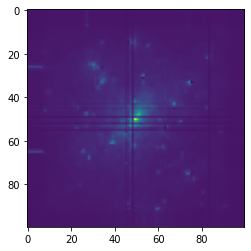

In [28]:
plt.imshow(newImage)